<a href="https://colab.research.google.com/github/Adukemi/OASIS_INFOBYTE/blob/main/Project4_L1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 4, Level 1**

# **Sentiment Analysis**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_user = pd.read_csv('/content/user_reviews.csv')
df_user.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [3]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [4]:
df_user.isnull().sum()

,0
App,0
Translated_Review,26868
Sentiment,26863
Sentiment_Polarity,26863
Sentiment_Subjectivity,26863


In [5]:
# Drop rows with NaN values in 'Translated_Review' and 'Sentiment' columns
df_user = df_user.dropna(subset=['Translated_Review', 'Sentiment'])

df_user.head(10)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
5,10 Best Foods for You,Best way,Positive,1.00,0.300000
6,10 Best Foods for You,Amazing,Positive,0.60,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.00,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.00,0.000000
10,10 Best Foods for You,good you.,Positive,0.70,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.20,0.100000


In [6]:
df_user.isnull().sum()

,0
App,0
Translated_Review,0
Sentiment,0
Sentiment_Polarity,0
Sentiment_Subjectivity,0



Confusion Matrix:
 [[ 681    8  964]
 [  32  104  913]
 [  49    6 4729]]




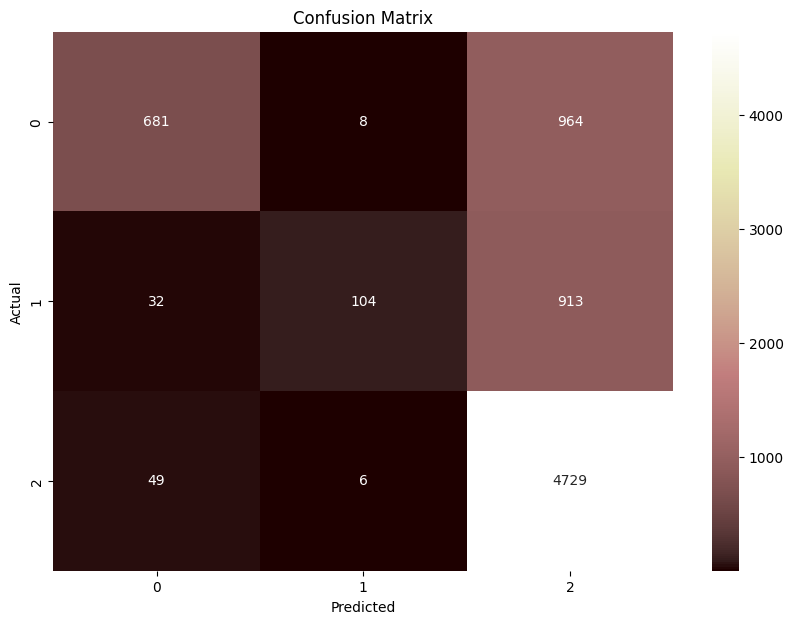




Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.41      0.56      1653
     Neutral       0.88      0.10      0.18      1049
    Positive       0.72      0.99      0.83      4784

    accuracy                           0.74      7486
   macro avg       0.83      0.50      0.52      7486
weighted avg       0.78      0.74      0.68      7486






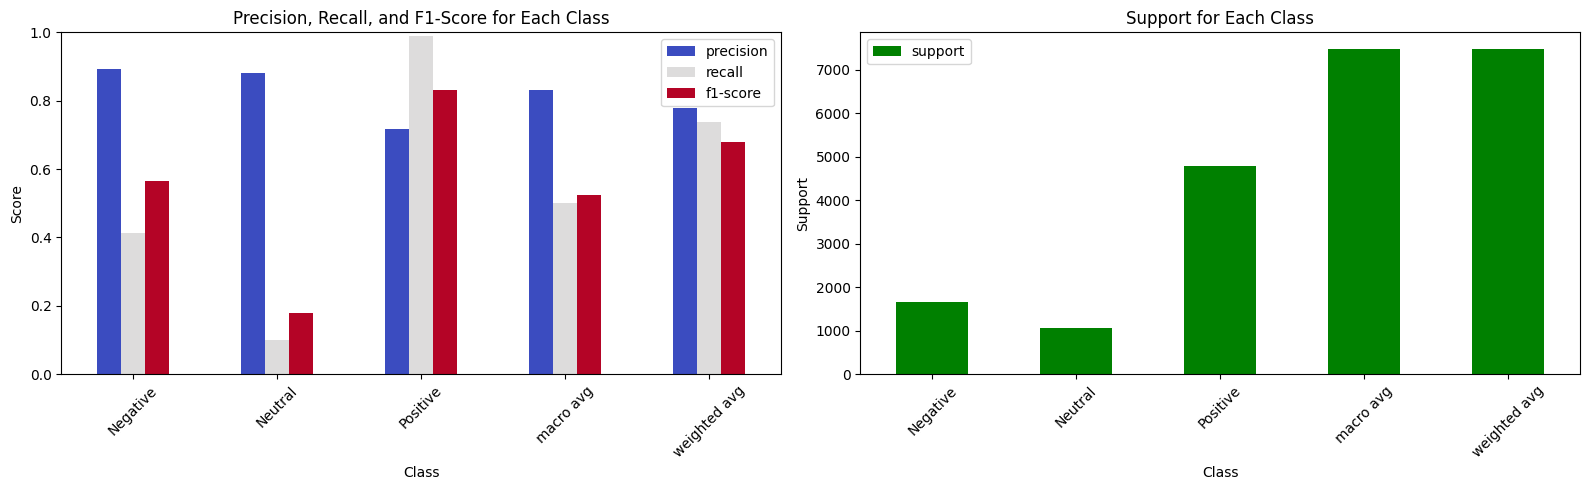

In [15]:
# Preprocessing: splitting data
X_train, X_test, y_train, y_test = train_test_split(df_user['Translated_Review'], df_user['Sentiment'], test_size=0.2, random_state=42)

# Transforming text data
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Model training
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test_tfidf)
classification_report_result = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
print("\nConfusion Matrix:\n", conf_matrix)

# Visualize confusion matrix
print("\n")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='pink')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("\n\n")
print("Classification Report:\n",classification_report(y_test, y_pred))
print("\n\n")

# Plot for the precision, recall, f1-score and support
metrics_df = pd.DataFrame(classification_report_result).transpose()
metrics_df = metrics_df.drop(['accuracy'], axis=0)  # Drop accuracy row for better visualization

# Create a single figure with 2 subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot Precision, Recall, and F1-Score with a different color palette
metrics_df[['precision', 'recall', 'f1-score']].plot(kind='bar', ax=axes[0], colormap='coolwarm')
axes[0].set_title('Precision, Recall, and F1-Score for Each Class')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Score')
axes[0].set_xticklabels(metrics_df.index, rotation=45)
axes[0].set_ylim(0, 1)

# Plot Support with a different color
metrics_df[['support']].plot(kind='bar', ax=axes[1], color='green')
axes[1].set_title('Support for Each Class')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Support')
axes[1].set_xticklabels(metrics_df.index, rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# **Insight:**
The classification report and confusion matrix provide insights into the performance of the Naive Bayes model. Key metrics such as precision, recall, and F1-score for each sentiment class (e.g., positive, negative, neutral) are displayed. The confusion matrix visualizes the number of correct and incorrect predictions, helping to identify any potential biases or areas where the model may be underperforming.

# Loading the Twitter dataset for the Analysis

In [8]:
# Load the Twitter data
df_twitter = pd.read_csv("/content/Twitter_Data.csv")

df_twitter.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [9]:
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131332 entries, 0 to 131331
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  131331 non-null  object 
 1   category    131330 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.0+ MB


In [10]:
# checking for missing data

df_twitter.isnull().sum()

,0
clean_text,1
category,2


In [11]:
# dropping and recheck for missing data

df_twitter.dropna(subset=['clean_text', 'category'], inplace=True)
df_twitter.isnull().sum()

,0
clean_text,0
category,0



Confusion Matrix:
 [[  529   133  4982]
 [   13  2798  6073]
 [   15   108 11615]]




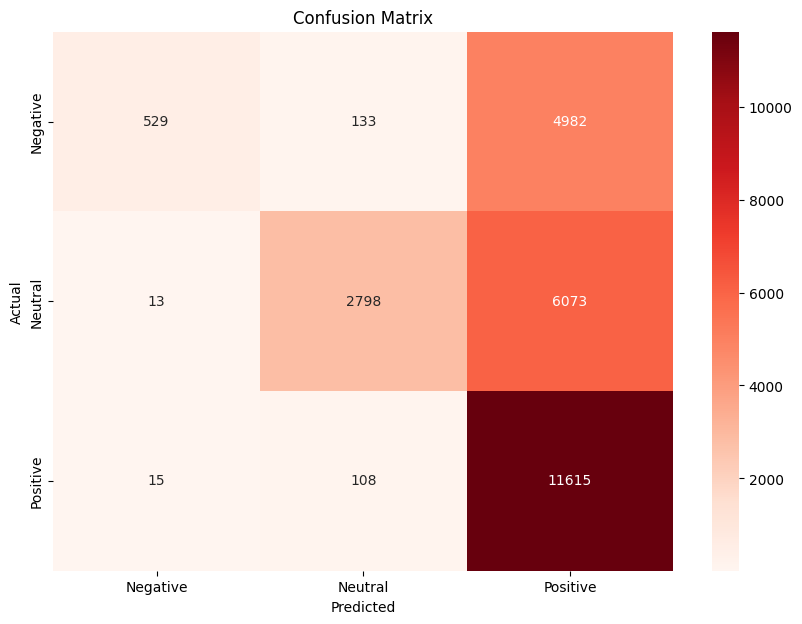




classification_report:
               precision    recall  f1-score   support

          -1       0.95      0.09      0.17      5644
           0       0.92      0.31      0.47      8884
           1       0.51      0.99      0.68     11738

    accuracy                           0.57     26266
   macro avg       0.79      0.47      0.44     26266
weighted avg       0.74      0.57      0.50     26266



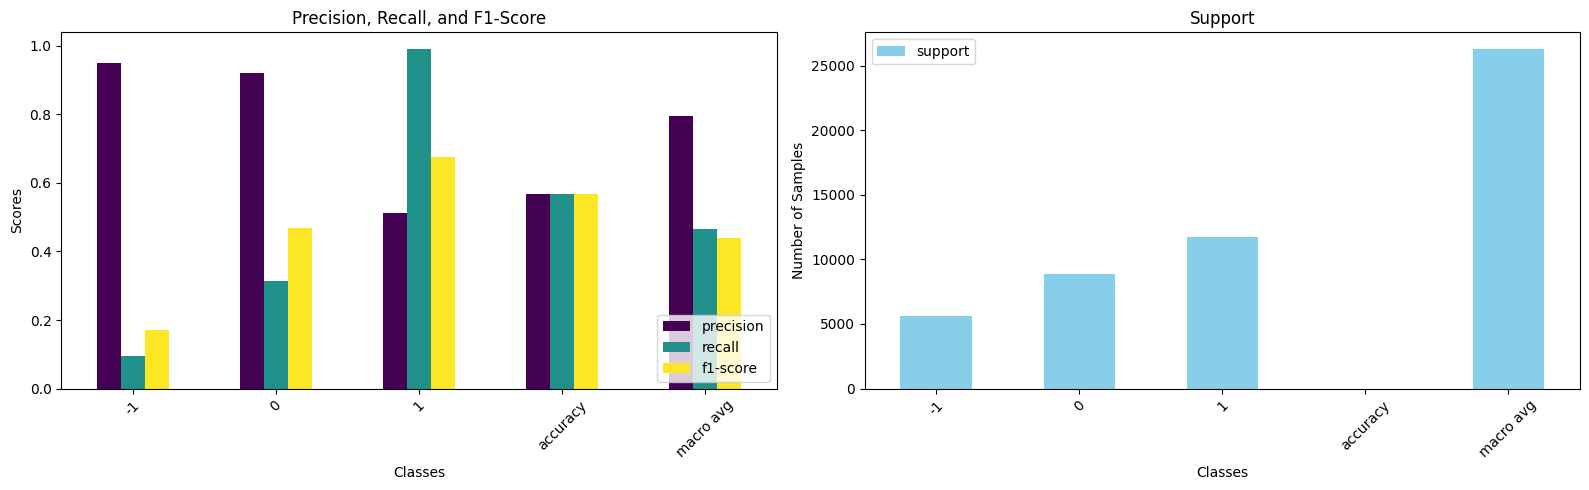

In [20]:
# Preprocess the data
df_twitter['category'] = df_twitter['category'].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_twitter['clean_text'], df_twitter['category'], test_size=0.2, random_state=42)

# Feature Engineering: Convert text data to TF-IDF features
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Implementing a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Predicting the test set results
y_pred = model.predict(X_test_tfidf)

# Evaluating the model
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n")

# Data Visualization: Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Reds', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
print("\n\n")

# Display Classification Report
print("classification_report:\n",classification_report(y_test, y_pred))

# Assuming 'metrics_df' contains the classification report data
metrics_df = pd.DataFrame(report).transpose()

# Create a single figure with 2 rows and 1 column
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot Precision, Recall, and F1-Score
metrics_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', ax=axes[0], colormap='viridis')
axes[0].set_title('Precision, Recall, and F1-Score')
axes[0].set_xlabel('Classes')
axes[0].set_ylabel('Scores')
axes[0].legend(loc='lower right')
axes[0].set_xticklabels(metrics_df.index[:-1], rotation=45)

# Plot Support
metrics_df[['support']].iloc[:-1].plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Support')
axes[1].set_xlabel('Classes')
axes[1].set_ylabel('Number of Samples')
axes[1].set_xticklabels(metrics_df.index[:-1], rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

# **Insight:**
The classification report and confusion matrix provide the following insights:
1. Precision, recall, and F1-score for each sentiment category (Negative, Neutral, Positive) are displayed in the classification report.
2. The confusion matrix shows the number of correct and incorrect predictions for each category.